In [1]:
using Pkg
Pkg.activate("/Users/ryansenne/Documents/Github/SSM/")
# Pkg.activate("/home/ryansenne/PycharmProjects/ssm_julia/")

  Activating project at `\Users\ryansenne\Documents\Github\SSM`


In [2]:
include("/Users/ryansenne/Documents/Github/SSM//src/SSM.jl")
# include("/home/ryansenne/PycharmProjects/ssm_julia/src/SSM.jl")
using Random
using .SSM
using Distributions
using Plots
using LinearAlgebra

In [6]:
# generate synthetic data for a Poisson Regression

β = [0.5, 0.5]

n = 1000

X = hcat(ones(n), randn(n, 1))

λ = exp.(X * β)
y = rand.(Poisson.(λ))

# specify the model
poissonreg = SSM.PoissonRegression()
fit!(poissonreg, reshape(X[:, 2], n, 1), y)


2-element Vector{Float64}:
 0.5379066666419323
 0.5036120723904456

In [3]:
# create data from a switching poisson regression
β1 = [0.5, 0.5]
β2 = [0.5, -0.5]

n = 1000

X = hcat(ones(n), randn(n, 1))
y = Vector{Int64}(undef, n)

for i in 1:n
    if rand() < 0.5
        λ = exp(X[i, :]' * β1)
    else
        λ = exp(X[i, :]' * β2)
    end
    y[i] = rand(Poisson(λ))
end

# specify the model
poissonreg = SSM.SwitchingPoissonRegression(;K=2)
fit!(poissonreg, reshape(X[:, 2], n, 1), y, 1000)

Log-Likelihood at iter 1: -2923.1430037463438
Log-Likelihood at iter 2: -1801.6403745077937
Log-Likelihood at iter 3: -1772.4848526521048
Log-Likelihood at iter 4: -1771.0761962980146
Log-Likelihood at iter 5: -1770.5863680206821
Log-Likelihood at iter 6: -1769.9963520556748
Log-Likelihood at iter 7: -1769.1331117504128
Log-Likelihood at iter 8: -1767.7454829836295
Log-Likelihood at iter 9: -1765.4706018071138
Log-Likelihood at iter 10: -1762.0518725114262
Log-Likelihood at iter 11: -1757.6767472879853
Log-Likelihood at iter 12: -1752.8333551329672
Log-Likelihood at iter 13: -1748.0312252717545
Log-Likelihood at iter 14: -1743.7416903510982
Log-Likelihood at iter 15: -1740.2755659291329
Log-Likelihood at iter 16: -1737.7024643489715
Log-Likelihood at iter 17: -1735.9089390793104
Log-Likelihood at iter 18: -1734.7093338198217
Log-Likelihood at iter 19: -1733.9246659935134
Log-Likelihood at iter 20: -1733.4145467575668
Log-Likelihood at iter 21: -1733.080259003904
Log-Likelihood at iter 

131-element Vector{Float64}:
   -Inf
 -2923.1430037463438
 -1801.6403745077937
 -1772.4848526521048
 -1771.0761962980146
 -1770.5863680206821
 -1769.9963520556748
 -1769.1331117504128
 -1767.7454829836295
 -1765.4706018071138
     ⋮
 -1729.1098984319437
 -1729.1098965964986
 -1729.1098949345599
 -1729.1098934297597
 -1729.109892067148
 -1729.1098908333886
 -1729.1098897162065
 -1729.1098887046353
 -1729.1098877887023

In [5]:
poissonreg.B

2-element Vector{RegressionEmissions}:
 RegressionEmissions(PoissonRegression([0.3508514026529784, -0.5672058387225166], true))
 RegressionEmissions(PoissonRegression([0.6026002202526055, 0.4253946453251814], true))

In [ ]:
# generate synthetic data to test the logistic regression model
β = [0.5, 1]

n = 10000

X = randn(n)
X = hcat(ones(n), X)

p = 1 ./ (1 .+ exp.(-X * β))

Y = rand.(Bernoulli.(p))

logreg = SSM.BernoulliRegression()
fit!(logreg, reshape(X[:, 2], n, 1), Vector{Float64}(Y))

In [29]:
# Parameters
n = 100000

A = [0.9 0.1; 0.1 0.9]
B = [0.5 1; 1 0.5]

# Generate feature matrix X
X = randn(n)
X = hcat(ones(n), X)

# Initialize S and Y
Y = zeros(Float64, n)
S = zeros(Int, n)

for i in 1:n
    if i == 1
        S[i] = rand(Bernoulli(0.5)) + 1
    else
        S[i] = rand(Bernoulli(A[S[i - 1], 1])) + 1
    end
    
    # generate the observation
    p = 1 / (1 + exp(-X[i, :]' * B[S[i], :]))
    Y[i] = rand(Bernoulli(p))
end

In [31]:
logreg = SSM.BernoulliRegression()
dep = Y[S .== 0]
indep = reshape(X[S .== 0, 2], length(dep), 1)

fit!(logreg, indep, dep)

2-element Vector{Float64}:
 0.9891422475741625
 0.1615263756944516

In [17]:
dep

UndefVarError: UndefVarError: `dep` not defined

In [16]:
S

100000-element Vector{Float64}:
 1.0
 0.0
 1.0
 0.0
 1.0
 0.0
 1.0
 0.0
 1.0
 0.0
 ⋮
 1.0
 0.0
 1.0
 0.0
 1.0
 0.0
 1.0
 1.0
 0.0

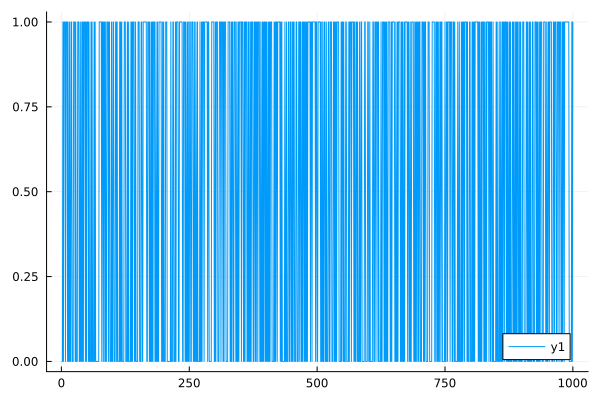

In [4]:
plot(Y)

In [32]:
switching_logreg = SSM.SwitchingBernoulliRegression(;K=2)
fit!(switching_logreg, reshape(X[:, 2], n, 1), Vector{Float64}(Y), 100)

Log-Likelihood at iter 1: -66266.16460618572
Log-Likelihood at iter 2: -58952.347300539244
Log-Likelihood at iter 3: -58790.77873267576
Log-Likelihood at iter 4: -58719.26620442212
Log-Likelihood at iter 5: -58675.71670720117
Log-Likelihood at iter 6: -58647.22596141085
Log-Likelihood at iter 7: -58627.728001074756
Log-Likelihood at iter 8: -58613.903057454765
Log-Likelihood at iter 9: -58603.81354378017
Log-Likelihood at iter 10: -58596.27123860564
Log-Likelihood at iter 11: -58590.51723760086
Log-Likelihood at iter 12: -58586.05005387671
Log-Likelihood at iter 13: -58582.52857632599
Log-Likelihood at iter 14: -58579.71493370193
Log-Likelihood at iter 15: -58577.43961800235
Log-Likelihood at iter 16: -58575.57952149084
Log-Likelihood at iter 17: -58574.04372108306
Log-Likelihood at iter 18: -58572.764052797014
Log-Likelihood at iter 19: -58571.688725982116
Log-Likelihood at iter 20: -58570.77791352067
Log-Likelihood at iter 21: -58570.00065207894
Log-Likelihood at iter 22: -58569.3326

101-element Vector{Float64}:
    -Inf
 -66266.16460618572
 -58952.347300539244
 -58790.77873267576
 -58719.26620442212
 -58675.71670720117
 -58647.22596141085
 -58627.728001074756
 -58613.903057454765
 -58603.81354378017
      ⋮
 -58561.35619161134
 -58561.30755724957
 -58561.25906192214
 -58561.21070021182
 -58561.16246683973
 -58561.11435693245
 -58561.06636603865
 -58561.01848993936
 -58560.97072439478

In [35]:
switching_logreg.B

2-element Vector{RegressionEmissions}:
 RegressionEmissions(Main.SSM.BernoulliRegression([0.34938646366579607, 1.0412991756032608], true))
 RegressionEmissions(Main.SSM.BernoulliRegression([1.0700900546723016, 0.5620678916982748], true))

In [4]:
# generate data from a "switching gaussian regression"
n = 100

A = [0.9 0.1; 0.1 0.9]
β₁, β₂ = [1.0, 2.0], [2.0, 1.0]
σ²₁, σ²₂ = 1.0, 0.5

X = randn(n, 1)
X = [ones(n) X]

Y = zeros(n)
S = zeros(n)

for i in 1:n
    if i == 1
        S[i] = rand(Bernoulli(0.5))
    else
        S[i] = rand(Bernoulli(A[Int(S[i-1]) + 1, 1]) )
    end
    if S[i] == 0
        Y[i] = X[i, :]'*β₁ + rand(Normal(0, sqrt(σ²₁)))
    else
        Y[i] = X[i, :]'*β₂ + rand(Normal(0, sqrt(σ²₂)))
    end
end

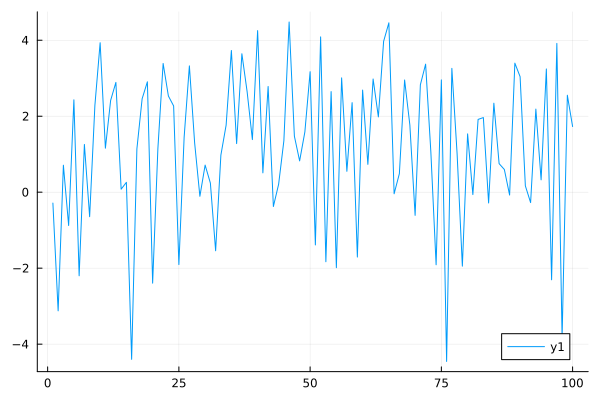

In [5]:
plot(Y)

In [6]:
model = SwitchingGaussianRegression(;K=2)

SwitchingGaussianRegression{Float64}([0.6227393706071742 0.37726062939282573; 0.6760242986555394 0.32397570134446063], RegressionEmissions[RegressionEmissions(GaussianRegression(Float64[], 0.0, true)), RegressionEmissions(GaussianRegression(Float64[], 0.0, true))], [0.16729561672448856, 0.8327043832755116], 2)

In [7]:
ll = SSM.fit!(model, reshape(X[:, 2], length(X[:, 2]), 1), Y, 1000, 1e-3, true)

Log-Likelihood at iter 1: -170.65760560474962
Log-Likelihood at iter 2: -157.59767932809117
Log-Likelihood at iter 3: -154.43351659776303
Log-Likelihood at iter 4: -151.44676334641503
Log-Likelihood at iter 5: -148.9280375187267
Log-Likelihood at iter 6: -146.91768543416856
Log-Likelihood at iter 7: -145.28779960378876
Log-Likelihood at iter 8: -143.79024644602197
Log-Likelihood at iter 9: -142.24178422927912
Log-Likelihood at iter 10: -140.80036591656878
Log-Likelihood at iter 11: -139.8488907999245
Log-Likelihood at iter 12: -139.37679664172458
Log-Likelihood at iter 13: -139.15836713531266
Log-Likelihood at iter 14: -139.05217952442197
Log-Likelihood at iter 15: -138.99515304063047
Log-Likelihood at iter 16: -138.96059541061902
Log-Likelihood at iter 17: -138.93743373508377
Log-Likelihood at iter 18: -138.92096774625972
Log-Likelihood at iter 19: -138.9089594203367
Log-Likelihood at iter 20: -138.90013327810829
Log-Likelihood at iter 21: -138.89364211254428
Log-Likelihood at iter 22

29-element Vector{Float64}:
  -Inf
 -170.65760560474962
 -157.59767932809117
 -154.43351659776303
 -151.44676334641503
 -148.9280375187267
 -146.91768543416856
 -145.28779960378876
 -143.79024644602197
 -142.24178422927912
    ⋮
 -138.90013327810829
 -138.89364211254428
 -138.88887567023815
 -138.88538176097825
 -138.88282390205006
 -138.88095264748745
 -138.87958401691586
 -138.87858289469696
 -138.87785034817168

In [9]:
model.B

2-element Vector{RegressionEmissions}:
 RegressionEmissions(GaussianRegression([1.9848756863102868, 0.8771873203592758], 0.5440589002007608, true))
 RegressionEmissions(GaussianRegression([0.9006853597770167, 1.9256299603190843], 0.8709946060103073, true))

In [8]:
using Optim
using ForwardDiff

function least_squares(β::AbstractVector, X::Matrix{Float64}, y::Vector{Float64}, w::Vector{Float64}=ones(length(y)), λ::Float64=0.0)
    # confirm that the model has been fit
    residuals =  y - (X * β)
    return sum(w.*(residuals.^2)) + λ * sum(β.^2)
end

# something is weird here with the gradient... I'll come back to it. Issue is with Optim, ForwardDiff produces same gradient as this function
function gradient!(G::Vector{Float64}, β::Vector{Float64}, X::Matrix{Float64}, y::Vector{Float64}, w::Vector{Float64}=ones(length(y)), λ::Float64=0.0)
    # calculate gradient
    residuals = y - X * β
    G .= (-2 * X' * Diagonal(w) * residuals) + 2 * λ * β
end

# generate some known data
n = 1000

β = [1, 2]
X = hcat(ones(n), randn(n))
y = X * β + randn(n);


In [10]:
# create fake Weights
w = rand(n)

f(β) = least_squares(β, X, y, w, 1.)
g!(grad, β) = gradient!(grad, β, X, y, w, 1.)
result = optimize(f, g!, [0., 0.], LBFGS())

result.minimizer

2-element Vector{Float64}:
 1.0315726949489283
 1.9864293857340394

In [11]:
grad = ForwardDiff.gradient(f, [0., 0.])

2-element Vector{Float64}:
 -1004.759544024799
 -1830.4687089259262

In [12]:
gradient!([0., 0.], [0., 0.], X, y, w, 1.)

2-element Vector{Float64}:
 -1004.7595440247989
 -1830.4687089259257

In [2]:
# test out regression
n = 1000

β = [1, 2]
X = hcat(ones(n), randn(n))
y = X * β + randn(n);

model = SSM.GaussianRegression()
fit!(model, reshape(X[:, 2], n, 1), y)

1.0236368252951853

In [3]:
model.β

2-element Vector{Float64}:
 0.970901202063067
 2.001130995831227